# Exploring Disney Land Wait Time Data Set

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
import sklearn.decomposition as skld
import matplotlib.pyplot as plt
import seaborn as sns
import imp


In [2]:
#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [3]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [4]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


In [5]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)


In [6]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [7]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [8]:
#find all posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])


In [9]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name #this changes to weekname
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name() #this changes to month name
meta_splash2.head()


,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN,Sunday,January
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN,Monday,January
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Tuesday,January
3,2012-01-04,17.142857,NaN,4,3,1,1,2012,CHRISTMAS,4,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Wednesday,January
4,2012-01-05,41.153846,NaN,5,4,1,1,2012,CHRISTMAS,5,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Thursday,January


## Correlation between SPOSTMIN & Predictors

In [10]:
## Running same code on all of metasplash_2
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419589
MKHOURSEMH            0.403368
WDWMAXTEMP            0.380868
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
EP09CAPACITY          0.323179
WDWMEANTEMP           0.320674
HSFIREWK              0.301307
YEAR                  0.297048
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.249910
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

## Distribution of Wait Times

count    2381.000000
mean       39.340985
std        19.019614
min         5.000000
25%        25.100000
50%        38.181818
75%        51.393443
max       135.000000
Name: SPOSTMIN, dtype: float64


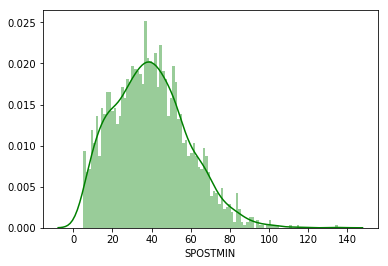

In [11]:
# Printing Wait Times Distribution after averaging wait time per day

print(meta_splash2['SPOSTMIN'].describe())
sns.distplot(meta_splash2['SPOSTMIN'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    2381.000000
mean       39.340985
std        19.019614
min         5.000000
25%        25.100000
50%        38.181818
75%        51.393443
max       135.000000
Name: SPOSTMIN, dtype: float64


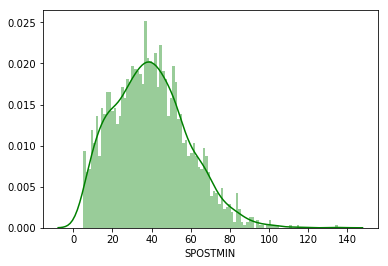

In [12]:
# Printing Wait Times

print(meta_splash2['SPOSTMIN'].describe())
sns.distplot(meta_splash2['SPOSTMIN'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Average Wait Time Per Month for Splash Mountain Ride



Text(0.5, 1.0, 'Splash Mountain Heatmap Month & Year')

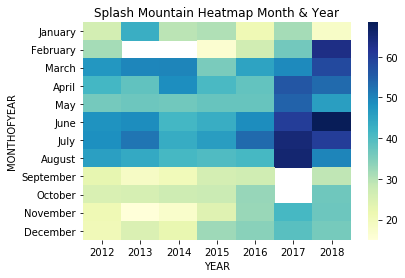

In [13]:
# Grouping by month and year

#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTHOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()
month_splash2 = month_splash2.pivot("MONTHOFYEAR", "YEAR", "SPOSTMIN").iloc[:,0:7] # Position based indexing
month_splash2 = month_splash2.rename(index= {1: "January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"} )

ax = sns.heatmap(month_splash2, cmap="YlGnBu")
ax.set_title('Splash Mountain Heatmap Month & Year')


White indicates when Magic Mountain was shut down for refurbishment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

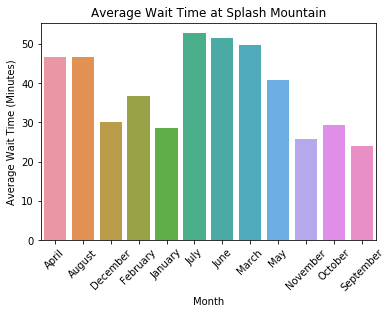

In [14]:
#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash2 = month_splash2.reset_index()


ax = sns.barplot(x="MONTH", y = "SPOSTMIN", data = month_splash2)
ax.set(xlabel = 'Month', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)


We see that on average wait times are the longest during peak summer months of July, June


In [15]:
month_splash2.loc[month_splash2['SPOSTMIN'].idxmax()] #Row with max index

MONTH          July
SPOSTMIN    52.7566
Name: 5, dtype: object

The month of July has the longest wait time on average. Let's take a closer look of the Month of July!

In [16]:
# Select July Only
july = meta_splash2[meta_splash2['MONTH'] == "July"]


In [17]:
## Dropping Useless Columns with >30% NA values

#july2 = july[[column for column in july if july[column].count() / len(july) >= 0.3]]
#print("List of dropped columns:", end=" ")
#for c in july.columns:
   # if c not in july2.columns:
       # print(c, end=", ")
#print('\n')
#july = july2


In [18]:
# How many Holidays in July?
july['HOLIDAYN'].drop_duplicates()


179    NaN
182    ind
Name: HOLIDAYN, dtype: object

Just one holiday in July, Indepdence Day. Lets look at hourly data on July 4th, Indepenence day!

In [19]:
july.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
179,2012-07-01,26.111111,NaN,1,182,27,7,2012,SUMMER BREAK,4,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Sunday,July
180,2012-07-02,30.833333,NaN,2,183,27,7,2012,JULY 4TH,3,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Monday,July
181,2012-07-03,36.666667,NaN,3,184,27,7,2012,JULY 4TH,2,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Tuesday,July
182,2012-07-04,78.571429,NaN,4,185,27,7,2012,JULY 4TH,0,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Wednesday,July
183,2012-07-05,61.666667,NaN,5,186,27,7,2012,JULY 4TH,2,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Thursday,July


In [20]:
## Finding Strongly Correlated Variables in July
july_corr = july.corr()['SPOSTMIN'][:-2] # -1 because the latest row is spostmin
golden_features_list = july_corr[abs(july_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list), golden_features_list))

There is 30 strongly correlated values with SPOSTMIN:
SPOSTMIN               1.000000
AKHOURSEMHYEST         0.489772
AKHOURSEMH             0.481589
HS20CAPACITY           0.460062
EP09CAPACITY           0.460062
AKHOURS                0.448709
AKHOURSYEST            0.446837
AKHOURSTOM             0.422477
AKHOURSEMHTOM          0.419154
YEAR                   0.391934
AKEMHETOM              0.386998
AKEMHEVE               0.386998
AKEMHEYEST             0.386998
CapacityLost_HS        0.365344
CapacityLostWGT_HS     0.360991
CapacityLost_EP        0.297201
CapacityLostWGT_EP     0.291402
MKDAYSSINCENONEVENT    0.285491
CapacityLostWGT_MK     0.253546
CapacityLost_MK        0.252166
HOLIDAY                0.225863
EPEMHMTOM              0.213546
EPHOURSEMHTOM          0.212326
MKPRDDAY               0.209673
AKEMHMTOM             -0.214564
MKHOURSEMHTOM         -0.222764
HSEMHEYEST            -0.229170
MKHOURSTOM            -0.274775
HSSHWNGT              -0.295154
MKPRDNGT          

In [21]:
# Longest Wait Time in July 4th of 2017
july.loc[july['SPOSTMIN'].idxmax(), 'SPOSTMIN']

91.62420382165605

Longest average wait time in July ever recorded was in July 4th, 2017.

## Average Wait Time Per Day From 2012-2019 For Splash Mountain

,DAYOFWEEK,SPOSTMIN
0,1,34.889497
1,2,42.694696
2,3,38.837722
3,4,41.806511
4,5,39.864147
5,6,37.761023
6,7,39.598304


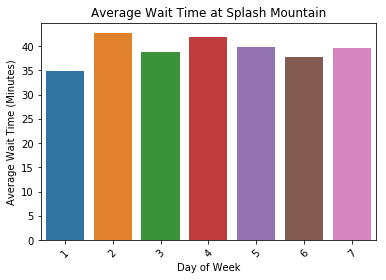

In [22]:
day_splash2 = meta_splash2.groupby('DAYOFWEEK')['SPOSTMIN'].mean()
day_splash2 = day_splash2.reset_index()

ax = sns.barplot(x="DAYOFWEEK", y = "SPOSTMIN", data = day_splash2)

# lEARN HOW TO CHANGE INDEXNAME/ ROW NAME
ax.set(xlabel = 'Day of Week', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)

day_splash2

Text(0.5, 1.0, 'Splash Mountain Heatmap Month & Day')

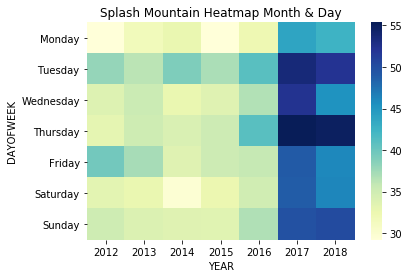

In [23]:
#Grouping by weekdays and year
#aggregate by weekday
day_splash2 = meta_splash2.groupby(['DAYOFWEEK', 'YEAR'])['SPOSTMIN'].mean().reset_index()
day_splash2 = day_splash2.pivot("DAYOFWEEK", "YEAR", "SPOSTMIN").iloc[:,0:7] # Position based indexing

# Changing Month Number to Name
day_splash2 = day_splash2.rename(index= {1: "Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"} )
ax = sns.heatmap(day_splash2, cmap="YlGnBu")


ax.set_title('Splash Mountain Heatmap Month & Day')

# Linear Regression on Splash Mountain Meta


In [24]:
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn import metrics
%matplotlib inline


In [25]:
# Finding Correlated Features
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419589
MKHOURSEMH            0.403368
WDWMAXTEMP            0.380868
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
EP09CAPACITY          0.323179
WDWMEANTEMP           0.320674
HSFIREWK              0.301307
YEAR                  0.297048
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.249910
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

In [26]:
golden_list_2 = golden_features_list_2.to_frame()
golden_list_2 = golden_list_2.reset_index()
golden_list_2 # = pd.DataFrame(golden_list,columns=['VARIABLES','SPOSTMIN'])
golden_list_2 = golden_list_2.iloc[:,0]
golden_list_2 = golden_list_2.tolist()
golden_list_2.remove('SPOSTMIN')


In [56]:
# Splitting Dataset between dependent & independent variables
x = meta_splash2[golden_list_2]
y = meta_splash2['SPOSTMIN']

#75% training & 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)



In [28]:
print('Number of observations:', x.shape[0])
print('Number of predictors:', x.shape[1])


Number of observations: 2381
Number of predictors: 41


In [55]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').